# <center><font color = "green"> Tips dataset </font></center>

<img src="Images/tipping.PNG" width="600" height="600" />

### <center><font color = "green"> Author: Barry Clarke </font></center>
### <center><font color = "green"> Course: Fundamentals of Data Analysis (Sept 2019) </font></center>

## Table of contents
1. [Tips dataset description](#http://localhost:8888/notebooks/Tips%20dataset.ipynb#Tips-dataset-description)<br>
    1.1 [Using_pandas_and_matplotlib](#http://localhost:8888/notebooks/Tips%20dataset.ipynb#1.-Using-pandas-and-matplotlib)<br>
    1.2 [Adding seaborn to the analysis](#http://localhost:8888/notebooks/Tips%20dataset.ipynb#2.-Adding-seaborn-to-the-analysis)<br> [1]

In [1]:
# Load libraries required for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tips dataset description

### 1. Using pandas and matplotlib
We can explore the tips dataset using pandas and matplotlib.

In [2]:
# Read in the tips dataset
data = pd.read_csv('Data/tips.csv')

It is generally good practice to have a look at the head and tail of the dataset to confirm the structure at the top and the bottom of the dataset are the same. It also helps give a visual of what is contained within the dataset.

In [3]:
# View the head of the dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# View the tail of the dataset
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


This tips dataset consists of 7 variables: Total bill, Tip, Gender(Sex), Smoker(Y/N), Day, Time and Size (Party size), and 244 records of each variable. Some variables are numbers, others are strings, while one (smoker) is a boolean entry.<br>

We will start our analysis by comparing the first two columns data

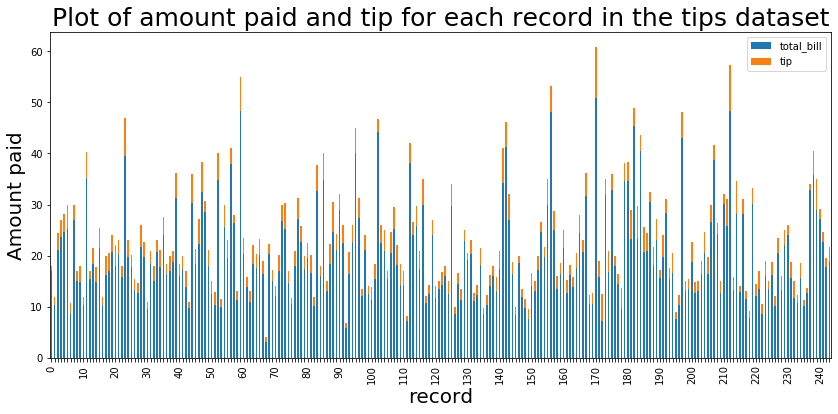

In [5]:
# Create a dataset with only total bill and tip included
data2 = data[["total_bill", "tip"]]
# Adjust the output plot sizes to be full page width [2]
plt.rcParams['figure.figsize'] = (14,6)
# Plot a stacked bar graph to show the total bill and the amount of tip for each record
ax = data2.plot.bar(stacked=True)
# Adding plot titles and axis labels, with font size adjustments
plt.title('Plot of amount paid and tip for each record in the tips dataset', size=25)
plt.xlabel('record', size=20)
plt.ylabel('Amount paid', size=20)
# Adjust the x-axis ticks to only display every 10th tick label [3]
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
      t.set_visible(False)

The above plot helps us visualise the tip size in relation to the total bill. This is useful, as a starting point to understaing the data. However, it is still difficult to extract any great detail from this plot. An improved view would be to concentrate on the percentage tip that is given in each case

Text(0, 0.5, 'Tip (% of total bill)')

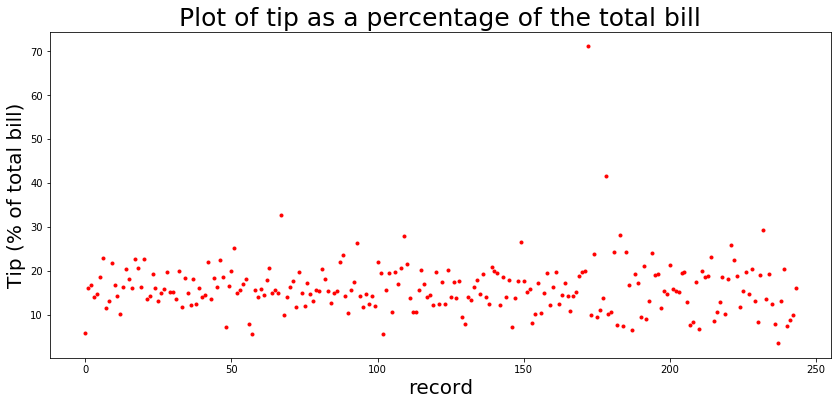

In [6]:
# Calculate the average tip per record, expressed as a percentage
avetip = data["tip"]/data["total_bill"]*100
plt.plot(avetip, 'r.')
# Adjust the output plot sizes to be full page width
plt.rcParams['figure.figsize'] = (14,6) # [2]
# Add plot titles and axis labels, with font size adjustments
plt.title('Plot of tip as a percentage of the total bill', size=25)
plt.xlabel('record', size=20)
plt.ylabel('Tip (% of total bill)', size=20)

This plot adds a little more detail to the first plot, helping us more easily see the tip as a percentage of the bill for each transaction. We can now say that tips mostly range from roughly 10% to 25% of the total bill

In [7]:
# Complete a statistical summary of the dataset
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We can see that the mean total bill is 19.78, with the median 17.79. This tells us that eventhough the average total bill is 19.78, more than 50% of the 244 records are below this average total bill

In [8]:
# Check for what percentage of records are below the mean
data2 = data[data.total_bill<19.78]
data2.count()
records=(data2.total_bill.count()/data.total_bill.count())*100
records

59.42622950819673

This shows that 60% of total_bills were below the mean total_bill value of 19.78. So, a heavier weight of transactions are below the mean ie 60% of tips are below the average tip 
Another thing to notice is the std dev of the total bill is 8.9, whereas the std dev of the tip is only 1.38. This may appear like a big difference, however, for data relating to tip, it is very often more beneficial to look at tip in terms of percentage of total bill. This gives us good reason to consider the tip in terms of percentage total_bill rather than actual tip value

In [9]:
# Insert a new column into the dataset for the percentage tip of total bill
data['tip_percentage'] = data["tip"]/data["total_bill"]*100

In [10]:
# View the head of the dataset with tip precentage included as a new variable
data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [11]:
# Complete a summary statistical analyses with tip percentage included
data.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


From the new column, "tip_percentage", we can see that the average tip is 16% of the total bill, with a std dev of 6.1.Comparing the std dev of the tip percentage with that of the total bill (8.9) would be a better way of comparing than the tip value std dev

In the above code and plots, we utilised the matplotlib library to create the plots. These plots are useful and informative. By adding the Seaborn library, we can enhance the plot stlying and add some quick, additional features that will achieve improved plots and understanding for the analyst with very efficient code

### 2. Adding seaborn to the analysis

By using the scatterplot() from the seaborn package, we can very easily view the tips dataset as a two dimensional plot, comparing total bill and tip, but the graphics can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style. 

In [12]:
# The tips dataset is in-built in the seaborn package, so we can open it using the load_dataset() function.
tips = sns.load_dataset("tips")

Now we can use seaborn to plot some scatter charts with more then two variables

In [13]:
# Insert a new column into the dataset for the percentage tip of total bill
tips['tip_percentage'] = tips["tip"]/tips["total_bill"]*100

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


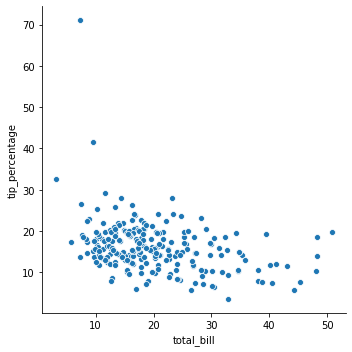

In [15]:
# Plot total_bill vs tip_percentage
sns.relplot(x="total_bill", y="tip_percentage", data=tips)

From the above plot we can see that there are two major outliers, both of which gave over 40% tip. We will omit these for now, so as to focus more on the common data

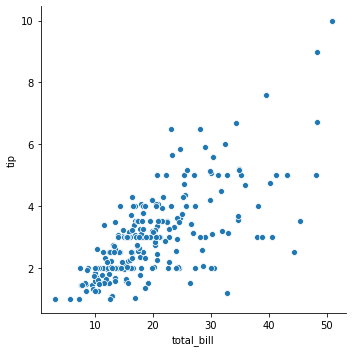

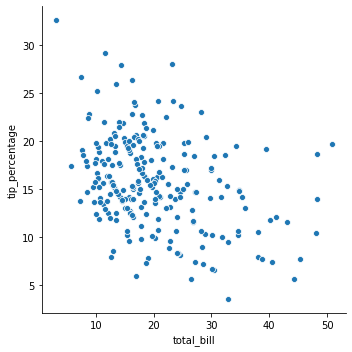

In [16]:
# Omit any data where tip_percentage is greater than 40%
tips2 = tips[tips.tip_percentage<40]
sns.relplot(x="total_bill", y="tip", data=tips2)
sns.relplot(x="total_bill", y="tip_percentage", data=tips2)

One interesting point to note from the above two plots is that, as the total_bill rises in value, so too does the tip value, however, the tip percentage of the bill falls. This means that customers are more likely to give a larger tip percentage with lower total_bills. This could be an interesting subject of focus for further analysis

Lets look at if tip values or percentage vary with any other variable in the dataset

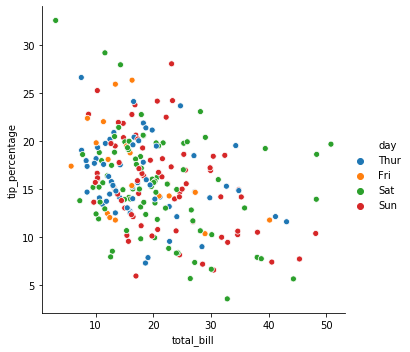

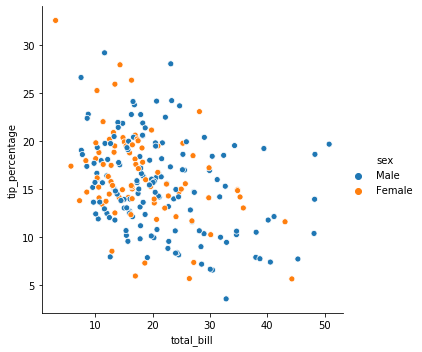

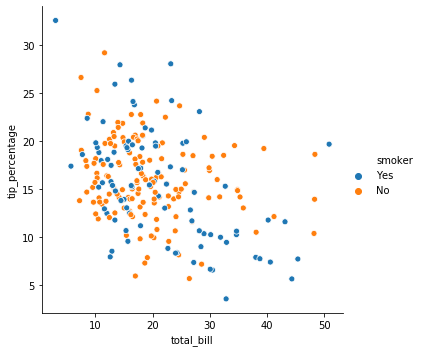

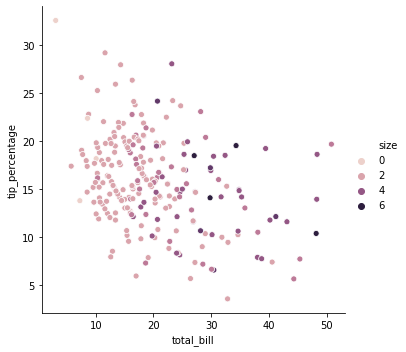

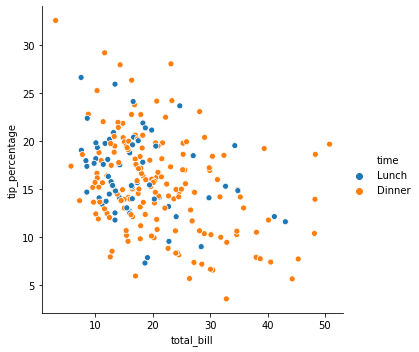

In [17]:
# Variance of tip_percentage by day
sns.relplot(x="total_bill", y="tip_percentage", hue="day", data=tips2)
# Variance of tip_percentage by gender
sns.relplot(x="total_bill", y="tip_percentage", hue="sex", data=tips2)
# Variance of tip_percentage by smoker
sns.relplot(x="total_bill", y="tip_percentage", hue="smoker", data=tips2)
# Variance of tip_percentage by party size
sns.relplot(x="total_bill", y="tip_percentage", hue="size", data=tips2)
# Variance of tip_percentage by mea
sns.relplot(x="total_bill", y="tip_percentage", hue="time", data=tips2)

In [18]:
# Select only certain columns to best sumarize the overall figures
tips = tips.loc[:, ['total_bill', 'tip', 'day', 'time', 'size']]
# Group the total figures based on day and meal time
tips.groupby(['day', 'time']).sum()

total_bill     tip   size
day  time                             
Thur Lunch      1077.55  168.83  150.0
     Dinner       18.78    3.00    2.0
Fri  Lunch        89.92   16.68   14.0
     Dinner      235.96   35.28   26.0
Sat  Lunch          NaN     NaN    NaN
     Dinner     1778.40  260.40  219.0
Sun  Lunch          NaN     NaN    NaN
     Dinner     1627.16  247.39  216.0

<font color = 'red'>Note:</font> We need to be careful with the above figures, as they only represent this particular waiter and not for the entire resturant. We can seet either restaurant does not open for lunch on Saturdays and Sundays, or the waiter does not work these shifts. It also shows the busier times for the waiter to be Saturday dinner time, Sunday dinner time and Thursday lunchtime, in that order. Friday is not so busy for the waiter.

## References

1. https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#2.4.2.2-Table-of-Contents-Support
2. https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib 
3. https://stackoverflow.com/questions/56095446/pandas-plot-bar-show-every-nth-xlabel